In [1]:
from rna2d.pipelines import Pipeline
%load_ext autoreload

In [26]:
%autoreload
p = Pipeline("/data/2d-rna/validation-pseudoknots/results.rpt")
methods, indeces = p.run_for_all()

In [27]:
%autoreload
nm, ci = p.filter_by_molecules(methods, indeces, "../metadata/representants.txt")

In [28]:
with open("../metadata/representants.txt") as f:
    repres = f.readlines()

repres = [r.strip() for r in repres]
print(len(repres))
repres = [r for r in repres if '-' not in r]
print(len(repres))


1646
1254


In [29]:
import pandas as pd
tool = 'rnafold'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
df = pd.DataFrame(methods[tool], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[tool])
res = df.loc[common_ind]
x = df.loc[df['INF']>0].head(100).tail()
print(
    f"All indeces: {len(indeces[tool])}, Representants: {len(repres)}, Intersection: {len(common_ind)}")
print(f"Before filtering: {df['INF'].mean()}")
print(f"After filtering: {res['INF'].mean()}")
print(x)


All indeces: 1570, Representants: 1254, Intersection: 123
Before filtering: 0.05778471337579618
After filtering: 0.023666666666666666
            PPV  TPR   F1  INF
7DUJ_1_W-Y  1.0  1.0  1.0  1.0
7DUK_1_W-Y  1.0  1.0  1.0  1.0
7DUL_1_W-Y  1.0  1.0  1.0  1.0
7ELP_1_B    1.0  1.0  1.0  1.0
7ELQ_1_B    1.0  1.0  1.0  1.0


### TODO
Analiza długości sekwencji
```
0-50
50-100
100-150
150-200
200+ / 200-300, 300-400, 400-500
```
Analiza reprezntantów w poszczególnych rodzinach: <br>
Rodziny można pobrać w json: [tutaj](https://rfam.org/family/RF00002/structures?content-type=application/json)<br>
Identyfikator PDB+chain





In [30]:
%autoreload
from rna2d.utils import get_names
tool = 'spot-rna'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
res = {}
for k in get_names():
    df = pd.DataFrame(methods[k], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[k])
    res[k] =  df.loc[common_ind]

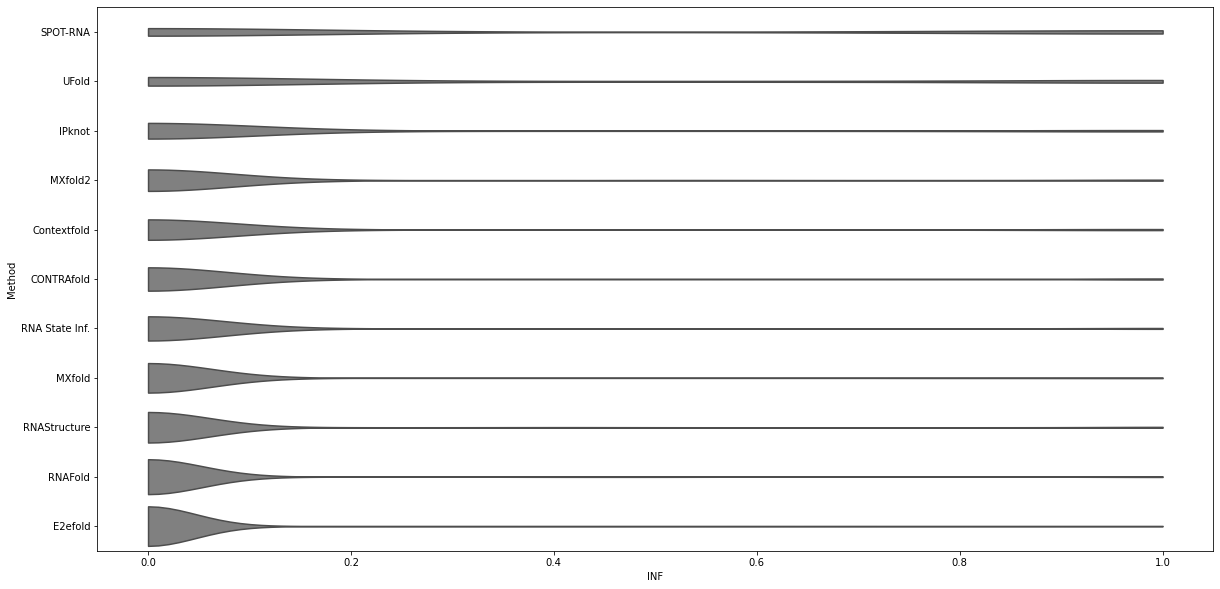

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.utils import get_sns_data, get_means_stds, get_DataFrames


means, stds, dfs = get_means_stds(res, indeces, out_path='../../results/noncanon')
dfmeans, dfstds = get_DataFrames(means, stds, out_path="../../results/noncanon", name='nwc')

d = get_sns_data(res, dfmeans, get_names())

fig, axs = plt.subplots(1, figsize=(20, 10))
ax = sns.violinplot(x='INF', y='Method', inner=None, color='grey', data=d, ax=axs, cut=0)

In [32]:
dfmeans

,PPV,TPR,F1,INF
spot-rna,0.30,0.32,0.31,0.31
ufold,0.25,0.26,0.26,0.26
ipknot,0.09,0.10,0.10,0.10
mxfold2,0.05,0.06,0.06,0.06
contextFold,0.06,0.06,0.06,0.06
contrafold,0.04,0.05,0.04,0.05
rna-state-inf,0.04,0.04,0.04,0.04
mxfold,0.03,0.03,0.03,0.03
rna-structure,0.03,0.03,0.03,0.03
rnafold,0.02,0.02,0.02,0.02


In [33]:
dfstds

,PPV,TPR,F1,INF
spot-rna,0.44,0.46,0.45,0.45
ufold,0.21,0.23,0.22,0.22
ipknot,0.41,0.42,0.41,0.42
mxfold2,0.22,0.24,0.23,0.23
contextFold,0.27,0.30,0.28,0.28
contrafold,0.20,0.22,0.20,0.20
rna-state-inf,0.14,0.14,0.14,0.14
mxfold,0.16,0.17,0.16,0.16
rna-structure,0.20,0.20,0.20,0.20
rnafold,0.16,0.16,0.16,0.16
